In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from config import key
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb() #this is needed for SQL Alchemy because they need a MySQL Library 

In [2]:
rds_connection_string = (f"root:{key}@127.0.0.1/mortality")
engine = create_engine(f'mysql://{rds_connection_string}')

In [3]:
engine.table_names()

['gis', 'hdi', 'suicide']

## Suicide_Df

In [100]:
suicide_df = pd.read_sql_query('select * from suicide', con=engine)
suicide_df.head()

,index,country,year,age,suicides_no,population
0,0,Albania,1987,15-24 years,21,312900
1,1,Albania,1987,35-54 years,16,308000
2,2,Albania,1987,15-24 years,14,289700
3,3,Albania,1987,75+ years,1,21800
4,4,Albania,1987,25-34 years,9,274300


In [101]:
suicide_df.head()

,index,country,year,age,suicides_no,population
0,0,Albania,1987,15-24 years,21,312900
1,1,Albania,1987,35-54 years,16,308000
2,2,Albania,1987,15-24 years,14,289700
3,3,Albania,1987,75+ years,1,21800
4,4,Albania,1987,25-34 years,9,274300


In [102]:
year_rate_df = suicide_df.copy()

In [103]:
year_rate_df.head()

,index,country,year,age,suicides_no,population
0,0,Albania,1987,15-24 years,21,312900
1,1,Albania,1987,35-54 years,16,308000
2,2,Albania,1987,15-24 years,14,289700
3,3,Albania,1987,75+ years,1,21800
4,4,Albania,1987,25-34 years,9,274300


In [104]:
year_rate_df.drop(['index','country','age'], axis=1, inplace=True)

In [105]:
year_rate_df.head()

,year,suicides_no,population
0,1987,21,312900
1,1987,16,308000
2,1987,14,289700
3,1987,1,21800
4,1987,9,274300


In [106]:
year_df = year_rate_df.groupby("year").sum()

In [107]:
year_df.head()

,suicides_no,population
year,,
1985,116063,1008600086
1986,120670,1029909613
1987,126842,1095029726
1988,121026,1054094424
1989,160244,1225514347


In [108]:
year_df["Suicide_rate_per_100k"] = ((year_df["suicides_no"]/year_df["population"])*100000)  

In [138]:
group_suicide = year_df
group_suicide = group_suicide.loc[group_suicide["year"]<2016,:]
group_suicide.head()

,year,Suicide_rate_per_100k
0,1985,11.507336
1,1986,11.716562
2,1987,11.583430
3,1988,11.481514
4,1989,13.075653


In [139]:
group_suicide.drop(['suicides_no','population'], axis=1, inplace=True)

KeyError: "['suicides_no' 'population'] not found in axis"

In [140]:
group_suicide.reset_index(inplace=True)
group_suicide.head()

,index,year,Suicide_rate_per_100k
0,0,1985,11.507336
1,1,1986,11.716562
2,2,1987,11.583430
3,3,1988,11.481514
4,4,1989,13.075653


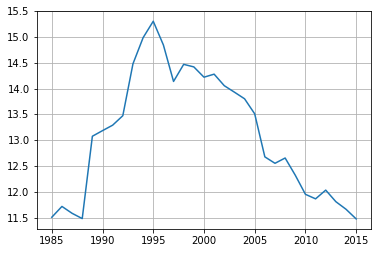

In [141]:
# Data for plotting

t = group_suicide["year"]
s = group_suicide["Suicide_rate_per_100k"]

fig, ax = plt.subplots()
ax.plot(t, s)

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("suicide_rate_per_100k_by_year.png")
plt.show()



## Climate Df

In [151]:
climate_df = pd.read_sql_query('select * from gis', con=engine)
climate_df.tail()

,ID,Year,Mean
132,265,1884,-0.28
133,267,1883,-0.21
134,269,1882,-0.10
135,271,1881,-0.12
136,273,1880,-0.20


In [152]:
climate_df.drop(['ID'], axis=1, inplace=True)

In [153]:
climate_df.rename(columns={'Year':'year'}, inplace=True)
climate_df.tail()

,year,Mean
132,1884,-0.28
133,1883,-0.21
134,1882,-0.10
135,1881,-0.12
136,1880,-0.20


In [155]:
Climate85_df = climate_df[climate_df['year'] > 1984]
Climate85_df.tail()

,year,Mean
27,1989,0.29
28,1988,0.41
29,1987,0.33
30,1986,0.19
31,1985,0.12


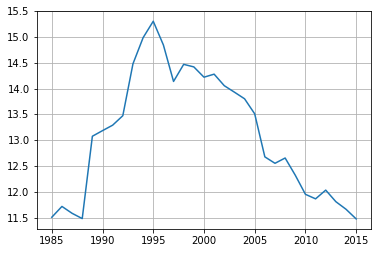

In [157]:
# Data for plotting

t = group_suicide["year"]
s = group_suicide["Suicide_rate_per_100k"]

fig, ax = plt.subplots()
ax.plot(t, s)

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("suicide_rate_per_100k_by_year.png")
plt.show()


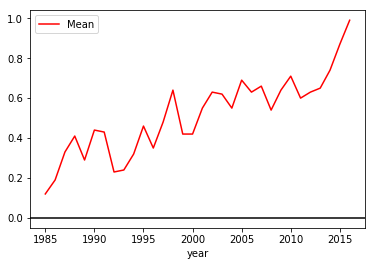

In [158]:
Climate85_df.plot(kind='line',x='year',y='Mean',color='red')
plt.axhline(0, color='black')
plt.show()

## HDI Df

In [9]:
hdi_df= pd.read_sql_query('select * from hdi', con=engine)
hdi_df.head()

,index,HDI Rank,Country,Human Development Index (HDI)
0,0,1.0,Norway,0.944
1,1,2.0,Australia,0.935
2,2,3.0,Switzerland,0.930
3,3,4.0,Denmark,0.923
4,4,5.0,Netherlands,0.922


In [20]:
hdi_df.drop(['index'], axis=1, inplace=True)

In [21]:
hdi_df.head()

,HDI Rank,Country,Human Development Index (HDI)
0,1.0,Norway,0.944
1,2.0,Australia,0.935
2,3.0,Switzerland,0.930
3,4.0,Denmark,0.923
4,5.0,Netherlands,0.922


## Climate vs All Countries Suicide

In [143]:
Climate_SuicideAll_df = pd.merge(Climate85_df, group_suicide, on='year', how='inner')
Climate_SuicideAll_df.head()

,year,Mean,index,Suicide_rate_per_100k
0,2015,0.87,30,11.474887
1,2014,0.74,29,11.661994
2,2013,0.65,28,11.808461
3,2012,0.63,27,12.032546
4,2011,0.60,26,11.863573


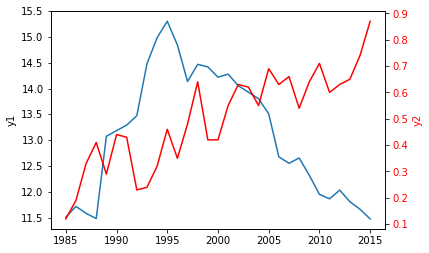

In [183]:
x = Climate_SuicideAll_df["year"]
y2 = Climate_SuicideAll_df["Mean"]
y1 = Climate_SuicideAll_df["Suicide_rate_per_100k"]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('y2', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.savefig('Climate vs All Countries Suicide.png')

## Climate vs Countries > 5 per 100k

In [145]:
suicide5_df = group_suicide[group_suicide['Suicide_rate_per_100k'] > 5.0]

In [159]:
Climate_Suicide5_df = pd.merge(climate_df, suicide5_df, on='year', how='inner')
Climate_Suicide5_df.head()

,year,Mean,index,Suicide_rate_per_100k
0,2015,0.87,30,11.474887
1,2014,0.74,29,11.661994
2,2013,0.65,28,11.808461
3,2012,0.63,27,12.032546
4,2011,0.60,26,11.863573


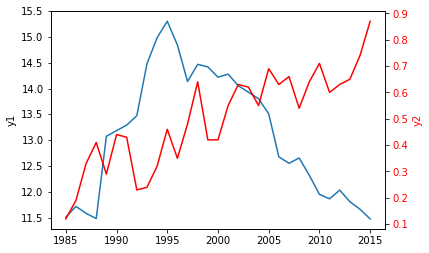

In [182]:
x = Climate_Suicide5_df["year"]
y2 = Climate_Suicide5_df["Mean"]
y1 = Climate_Suicide5_df["Suicide_rate_per_100k"]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('y2', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.savefig('Climate vs Countries Suicides Greater than 5 per 100k.png')

## Climate vs Countries HDI > .85

In [161]:
HDI85_df = hdi_df[hdi_df['Human Development Index (HDI)'] > 0.85]
HDI85_df.tail()

,HDI Rank,Country,Human Development Index (HDI)
26,27.0,Italy,0.873
27,28.0,Czech Republic,0.870
28,29.0,Greece,0.865
29,30.0,Estonia,0.861
30,31.0,Brunei Darussalam,0.856


In [162]:
HDI85_df.rename(columns={'Country':'country'}, inplace=True)
HDI85_df.tail()

,HDI Rank,country,Human Development Index (HDI)
26,27.0,Italy,0.873
27,28.0,Czech Republic,0.870
28,29.0,Greece,0.865
29,30.0,Estonia,0.861
30,31.0,Brunei Darussalam,0.856


In [171]:
CountryHDI_df = pd.merge(HDI85_df, suicide_df, on='country', how='inner')
CountryHDI_df.tail()

,HDI Rank,country,Human Development Index (HDI),index,year,age,suicides_no,population
9357,30.0,Estonia,0.861,8601,2015,35-54 years,11,178380
9358,30.0,Estonia,0.861,8602,2015,25-34 years,2,92783
9359,30.0,Estonia,0.861,8603,2015,15-24 years,1,66216
9360,30.0,Estonia,0.861,8604,2015,5-14 years,1,67802
9361,30.0,Estonia,0.861,8605,2015,5-14 years,1,71561


In [173]:
CountryHDI_df = CountryHDI_df.loc[CountryHDI_df["year"]<2016,:]

In [174]:
HDIsum_df = CountryHDI_df.groupby("year").sum()
HDIsum_df.tail()

,HDI Rank,Human Development Index (HDI),index,suicides_no,population
year,,,,,
2011,5040.0,291.600,4575270,120518,870582188
2012,5040.0,291.600,4579158,119462,876204335
2013,5040.0,291.600,4583046,120460,879786289
2014,4824.0,269.688,4310082,115176,847243917
2015,4488.0,248.040,4051206,105337,787175622


In [175]:
HDIsum_df.drop(['index','Human Development Index (HDI)','HDI Rank'], axis=1, inplace=True)
HDIsum_df.tail()

,suicides_no,population
year,,
2011,120518,870582188
2012,119462,876204335
2013,120460,879786289
2014,115176,847243917
2015,105337,787175622


In [176]:
HDIsum_df["Suicide_rate_per_100k"] = ((HDIsum_df["suicides_no"]/HDIsum_df["population"])*100000) 
HDIsum_df.tail()

,suicides_no,population,Suicide_rate_per_100k
year,,,
2011,120518,870582188,13.843380
2012,119462,876204335,13.634034
2013,120460,879786289,13.691962
2014,115176,847243917,13.594196
2015,105337,787175622,13.381639


In [177]:
HDIsum_df.drop(['suicides_no','population'], axis=1, inplace=True)
HDIsum_df.tail()

,Suicide_rate_per_100k
year,
2011,13.843380
2012,13.634034
2013,13.691962
2014,13.594196
2015,13.381639


In [178]:
Climate_SuicideHDI_df = pd.merge(climate_df, HDIsum_df, on='year', how='inner')
Climate_SuicideHDI_df.head()

,year,Mean,Suicide_rate_per_100k
0,2015,0.87,13.381639
1,2014,0.74,13.594196
2,2013,0.65,13.691962
3,2012,0.63,13.634034
4,2011,0.60,13.843380


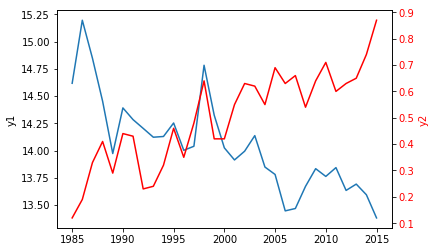

In [181]:

x = Climate_SuicideHDI_df["year"]
y2 = Climate_SuicideHDI_df["Mean"]
y1 = Climate_SuicideHDI_df["Suicide_rate_per_100k"]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('y2', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig('Climate vs Countries HDI Greater than .85.png')